# Initialization

In [37]:
# us this script to add the src folder to the python path (if birt-gd are not installed)
import sys
from nb_utils import set_root
PROJECT_DIR = set_root(1)
sys.path.append(str(PROJECT_DIR / "src"))

In [38]:
import pandas as pd

# Usage

Import the **BIRT's** class


In [39]:
from birt import Beta4

In [40]:
data = pd.DataFrame(
    {
        'a': [0.99, 0.89, 0.87, 0.50],
        'b': [0.32, 0.25, 0.45, 0.20],
        'c': [0.50, 0.50, 0.50, 0.50]
    }
)

In [41]:
bgd = Beta4(
    learning_rate=1, 
    epochs=10000,
    n_respondents=data.shape[1], 
    n_items=data.shape[0],
    n_inits=1000,
    # n_workers=-1,
    random_seed=1,
    tol=10**(-5),
    set_priors=True
)
bgd.fit(data.values)

  0%|          | 14/10000 [00:00<01:11, 139.04it/s]

Model converged at the 24th epoch


  0%|          | 24/10000 [00:00<01:03, 156.01it/s]
W0000 00:00:1739567647.550733    4426 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [42]:
bgd.abilities

array([0.62599856, 0.4157101 , 0.4741606 ], dtype=float32)

In [43]:
bgd.difficulties

array([0.4555296 , 0.4779129 , 0.44193327, 0.6075782 ], dtype=float32)

In [44]:
bgd.discriminations

array([0.99179965, 0.9999737 , 0.96063244, 0.79214346], dtype=float32)

# Summary data

How to use the summary feature:

* **Generate data**

In [45]:
import numpy as np

In [46]:
m, n = 5, 20
np.random.seed(1)
abilities = [np.random.beta(1,i) for i in ([0.1, 10] + [1]*(m-2))]
difficulties = [np.random.beta(1,i) for i in [10, 5] + [1]*(n-2)]
discrimination = list(np.random.normal(1,1, size=n))
pij = pd.DataFrame(columns=range(m), index=range(n))

i,j = 0,0
for theta in abilities:
  for delta, a in zip(difficulties, discrimination):
    alphaij = (theta/delta)**(a)
    betaij = ((1-theta)/(1 - delta))**(a)
    pij.loc[j,i] = np.random.beta(alphaij, betaij, size=1)[0]
    j+=1
  j = 0
  i+=1
  pij = pij.astype(float)

* **Fitting the model**

In [54]:
bgd = Beta4(
        learning_rate=0.1, 
        epochs=10000,
        n_respondents=pij.shape[1],
        n_items=pij.shape[0],
        n_inits=1000, 
        n_workers=-1,
        random_seed=1,
        tol=10**(-8),
        set_priors=True
    )
bgd.fit(pij.values)

  0%|          | 14/10000 [00:00<01:14, 134.16it/s]W0000 00:00:1739567855.178464    4426 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
100%|██████████| 10000/10000 [00:50<00:00, 199.07it/s]


* **Score (Pseudo - R<sup>2</sup>)**

In [55]:
bgd.score

0.8878812010701687

* **Summary**

In [49]:
bgd.summary()


        ESTIMATES
        -----
                        | Min      1Qt      Median   3Qt      Max      Std.Dev
        Ability         | 0.00012  0.21369  0.57847  0.69513  0.93050  0.33468
        Difficulty      | 0.03876  0.27725  0.58860  0.84598  0.96604  0.30748
        Discrimination  | 0.25266  0.73648  1.04295  1.35130  2.09018  0.47445
        pij             | 0.00000  0.04613  0.40412  0.81140  0.99958  0.36590
        -----
        Pseudo-R2       | 0.88788
        


# Using Scatterplot feature

In [50]:
import matplotlib.pyplot as plt

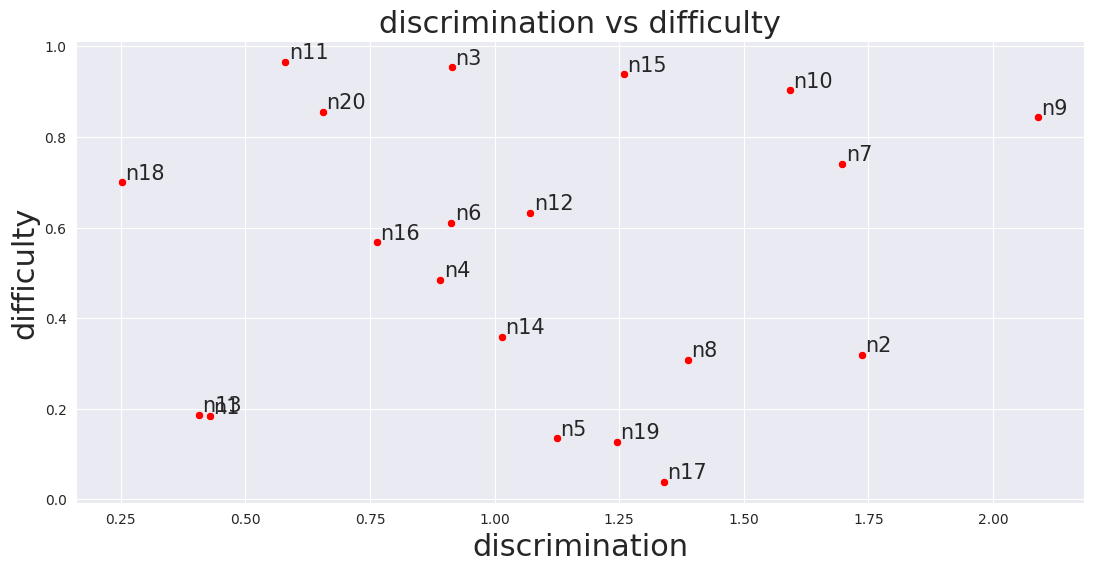

In [51]:
bgd.plot(xaxis='discrimination',
        yaxis='difficulty',
        ann=True,
        kwargs={'color': 'red'},
        font_size=22,font_ann_size=15)
plt.show()

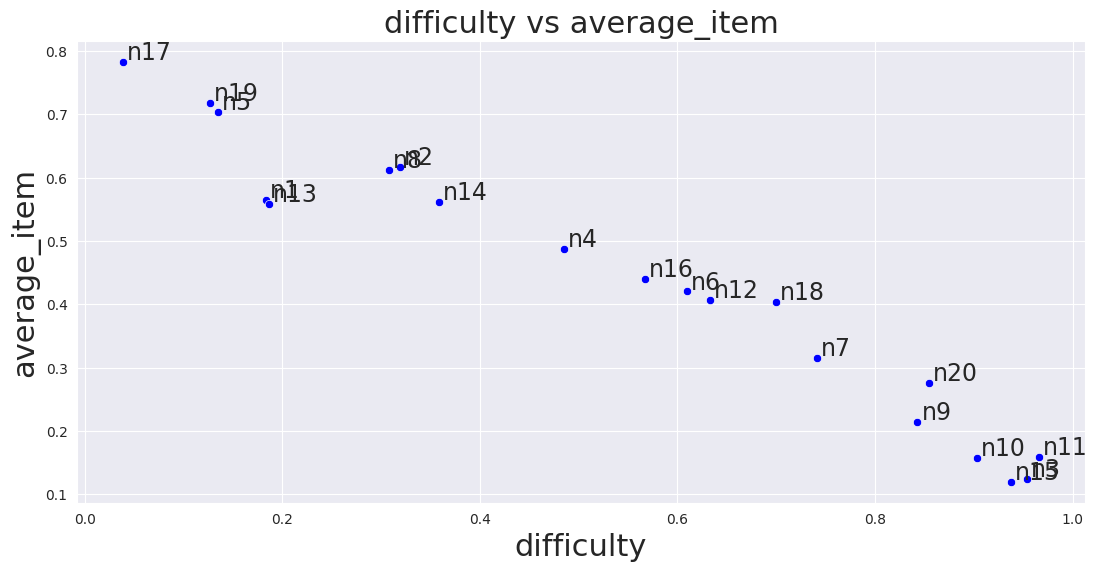

In [52]:
bgd.plot(xaxis='difficulty', 
        yaxis='average_item',
        ann=True,
        kwargs={'color': 'blue'},
        font_size=22,
        font_ann_size=17)
plt.show()